In [1]:
#import fwiVis.fwiVis as fv
import s3fs
s3 = s3fs.S3FileSystem(anon=False)
from math import cos, asin, sqrt
import re

import numpy as np
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
import os
import rioxarray as rio
import xarray as xr
import rasterio
import glob
from shapely.errors import ShapelyDeprecationWarning
from shapely.geometry import Point
import warnings
import folium
import datetime
import time
from folium import plugins
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
import contextily as cx
from shapely.geometry import box
import sys
from datetime import datetime, timedelta
from itertools import chain
from bs4 import BeautifulSoup # I mamba installed bs4
import requests

from datetime import date


sys.path.insert(0, '/projects/old_shared/fire_weather_vis/base-fwi-vis/')
import fwiVis.fwiVis as fv

In [28]:
path = "/projects/old_shared/fire_weather_vis/Lightning_analysis/fwi_timeline_only/April_1_unmerged_fires_with_FWI.csv"

fires = fv.prep_fire_files(path)
#fires = fires.set_crs("4326")
#fires = fires.set_crs("3571")
proj_fires = fires[~fires.geometry.isna()].to_crs("4326")
#proj_fires = fires[~fires.geometry.isna()]
proj_fires.t = proj_fires.t.astype("datetime64[ns]")
proj_fires["days_since"] = (proj_fires.t - proj_fires.t.min())
proj_fires["days_since"] = proj_fires["days_since"].dt.days

print(proj_fires.t.max())
print(proj_fires.t.min())

In [73]:
import matplotlib as mpl
import cartopy.crs as ccrs

In [119]:
### Read in Supression zones

zones = gpd.read_file("/projects/old_shared/fire_weather_vis/Lightning_analysis/supression_zones_quebec/Full_response_limit.shp")
zones= zones.set_crs(32198)

zones = zones.to_crs("4326")

In [123]:
### Read in shapefiles of provences

prov = fv.ca_prov()
prov

,prov_name_fr,prov_name_en,geometry
0,Alberta,Alberta,"POLYGON ((-110.00502 48.99970, -110.00449 49.5..."
1,Yukon,Yukon,"MULTIPOLYGON (((-139.13388 69.63737, -139.2478..."
2,Manitoba,Manitoba,"POLYGON ((-94.82808 60.00000, -95.32500 60.000..."
3,Terre-Neuve-et-Labrador,Newfoundland and Labrador,"MULTIPOLYGON (((-53.63678 48.87151, -53.67894 ..."
4,Nouveau-Brunswick,New Brunswick,"MULTIPOLYGON (((-66.93908 45.02470, -67.01600 ..."
5,Territoires du Nord-Ouest,Northwest Territories,"MULTIPOLYGON (((-109.83296 75.93393, -110.0324..."
6,Île-du-Prince-Édouard,Prince Edward Island,"POLYGON ((-61.98606 46.46286, -62.14666 46.484..."
7,Saskatchewan,Saskatchewan,"POLYGON ((-102.00000 60.00000, -102.75000 60.0..."
8,Nouvelle-Écosse,Nova Scotia,"MULTIPOLYGON (((-65.60612 43.51377, -65.65127 ..."
9,Ontario,Ontario,"MULTIPOLYGON (((-79.91454 44.99301, -79.91794 ..."


In [130]:
# Define the CartoPy CRS object.
#crs = ccrs.LambertConformal()
crs = ccrs.PlateCarree()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init



proj_fires = proj_fires.to_crs(crs_proj4)


# The lat-long proj
noProj = ccrs.PlateCarree()
# The projection of the map
myProj = ccrs.LambertConformal(central_longitude=-73.24, central_latitude=51.9)
myProj._threshold = myProj._threshold/20.  # Set for higher precision of the projection



with mpl.rc_context({'font.size': 30}):
    #fig, ax = plt.subplots(subplot_kw=dict(projection=crs), figsize=(20, 20))
    plot = proj_fires.plot(facecolor="none",figsize=(20, 20), column = "days_since", 
    #proj_fires.plot(ax = ax, facecolor="none",figsize=(20, 20), column = "days_since", 
                           cmap = 'autumn_r', 
                           legend=True, 
                           legend_kwds={'ticks': [], "orientation":"horizontal"},)
    zones.plot(ax = plot)
    prov[prov.prov_name_en == 'Quebec'].plot(ax = plot, facecolor = "none", edgecolor = "white")
    
    cx.add_basemap(ax = plot, source=cx.providers.Esri.WorldImagery, attribution = False, crs = proj_fires.crs.to_string())
                    #crs=gdf.crs.to_string(), source=cx.providers.NASAGIBS.ModisTerraBands367CR)
        
plt.savefig('Quebec_largefire.png', dpi = 900, transparent = True)

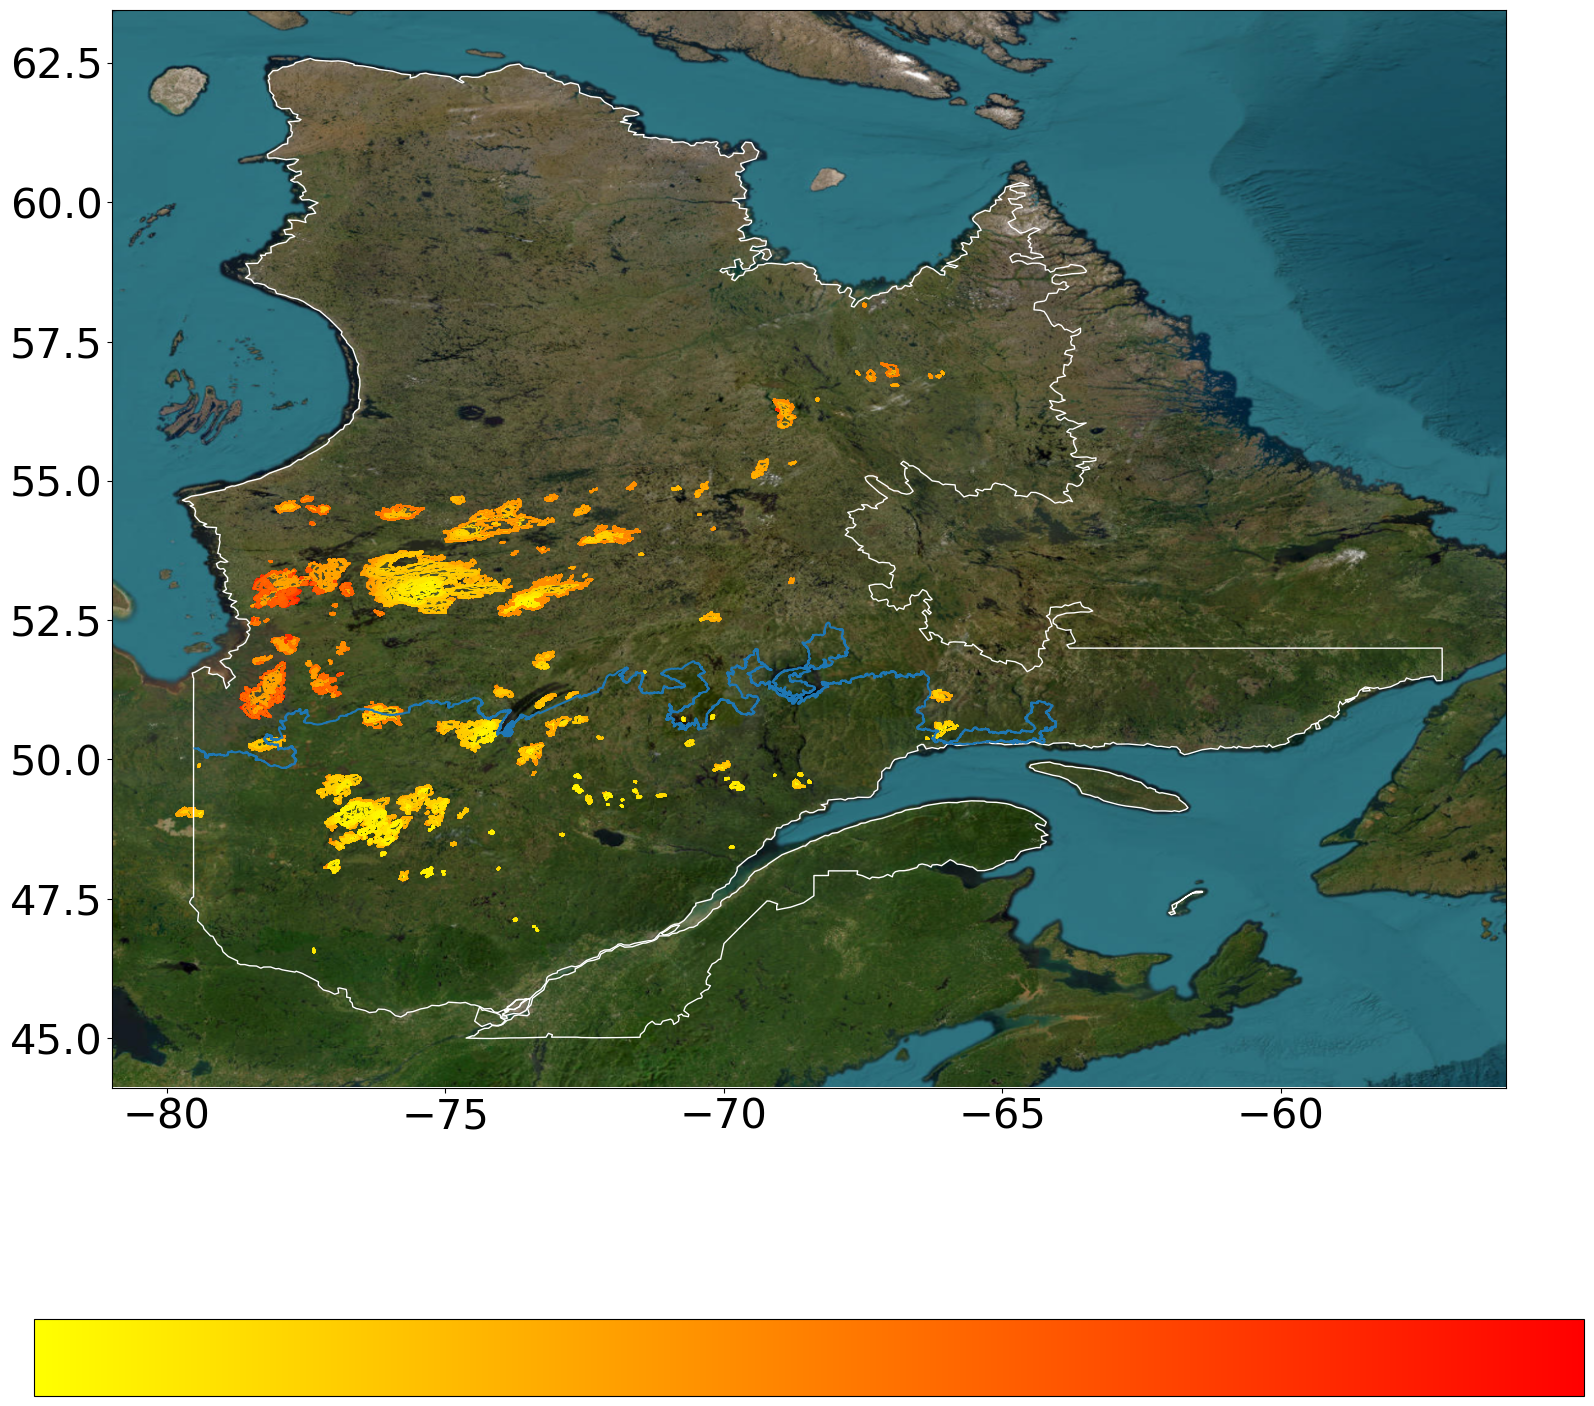

In [129]:
plt.show()

In [54]:
#proj_fires

In [109]:
# import cartopy.crs as ccrs
# import cartopy
# import matplotlib.pyplot as plt
# import matplotlib.path as mpath

# #crs = ccrs.LambertConformal()
# #crs = ccrs.PlateCarree()
# crs = ccrs.LambertConformal(central_longitude=-73.24, central_latitude=51.49)
# # This can be converted into a `proj4` string/dict compatible with GeoPandas
# crs_proj4 = crs.proj4_init



# proj_fires = proj_fires.to_crs(crs_proj4)


# # The lat-long proj
# noProj = ccrs.PlateCarree()
# # The projection of the map

# central_longitude=-73.24
# central_latitude=51.49

# dist =  2

# myProj = ccrs.LambertConformal(central_longitude=-73.24, central_latitude=51.49)
# myProj._threshold = myProj._threshold/2.  # Set for higher precision of the projection

# ax = plt.axes(projection=myProj)

# # This plots parallel and meridian arcs around a target area that will be used ...
# #  as the map boundary

# minx = proj_fires.bounds.minx.min() - dist
# maxx = proj_fires.bounds.maxx.max() + dist
# miny = proj_fires.bounds.miny.min() - dist
# maxy = proj_fires.bounds.maxy.max() + dist

# [ax_hdl] = ax.plot([minx , maxx, maxx, minx , minx ], [miny, miny, maxy, maxy, miny],
#          color='black', linewidth=0.5, marker='none',
#          transform=noProj)
# # Get the `Path` of the plot
# tx_path = ax_hdl._get_transformed_path()
# path_in_data_coords, _ = tx_path.get_transformed_path_and_affine()

# # Use the path's vertices to create a polygon
# polygon = mpath.Path( path_in_data_coords.vertices )
# ax.set_boundary(polygon) #This masks-out unwanted part of the plot
# proj_fires.plot(ax = ax, facecolor="none", column = "days_since",
#                            cmap = 'autumn_r', 
#                            legend=True, 
#                            legend_kwds={'ticks': [], "orientation":"horizontal"},)

# ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)
# #ax.add_feature(cartopy.feature.OCEAN, linewidth=.3, color='lightblue')
# #ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')

# ax.title.set_text("Meridians and Parallels as Boundary")
# plt.show()

In [88]:
proj_fires.bounds

,minx,miny,maxx,maxy
0,-70.418504,52.499671,-70.384016,52.524917
1,-70.422866,52.496132,-70.368555,52.533138
2,-70.422866,52.494301,-70.351465,52.536009
3,-70.422866,52.494301,-70.351465,52.536009
4,-70.422866,52.494301,-70.351465,52.536009
...,...,...,...,...
10194,-72.210289,53.987599,-72.101950,54.017959
10195,-72.196258,53.987599,-72.120810,54.014931
10196,-72.187400,53.994249,-72.154222,54.013050
10197,-72.256279,53.987599,-72.083934,54.039241


In [87]:
proj_fires.bounds.minx

0       -70.418504
1       -70.422866
2       -70.422866
3       -70.422866
4       -70.422866
           ...    
10194   -72.210289
10195   -72.196258
10196   -72.187400
10197   -72.256279
10198   -72.278970
Name: minx, Length: 10199, dtype: float64